# Predicting Credit Card Fraud Detection using Machine Learning  
This notebook look into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheather or not it's fraudulent credit card transactions.

We're going to take the following aproach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

# 1. Problem definition

> It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# 2. Data

> Data come from Kaggle : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# 3. Evaluation

> If we can reach 90% accuracy at predicting wheater or not a transaction it's fraudulent , we'll pursue the project.

# 4. Features

**Create data dictionary**
* Time - Number of seconds elapsed between this transaction and the first transaction in the dataset.
* V1 - may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28). Privacy of cardholders, the features of the dataset is been encrypted. Therefore, we don't know what the features stand for, they are non-interpretable but meaningful.
* Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


# Preparing the tools

We're going to use pandas, NumPy and Matplotlib for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedShuffleSplit


# Load Data

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become subject matter exper on the dataset.

1. What question(s) are you trying to solve?
2. What kind of data do we have?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of your data?

In [110]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [111]:
# Let's find out how many of each class there
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

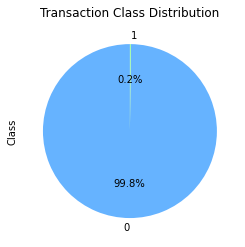

<Figure size 720x432 with 0 Axes>

In [6]:
# In this context of our credit card fraud detection problem, it is an imbalanced classification problem.
fraud_counts = df['Class'].value_counts()
fraud_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = ['#66b3ff', '#99ff99'])
plt.title('Transaction Class Distribution')
plt.figure(figsize=(10, 6))
plt.show();

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [114]:
# Are there any missing values?
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [115]:
# Find a bit more about our data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148787,90205.0,2.041104,0.261798,-1.351364,0.745564,0.210638,-1.136731,0.083182,-0.332693,1.790316,...,-0.484627,-1.061293,0.418855,0.982631,-0.360595,0.102078,-0.090813,-0.032259,1.98,0
42769,41237.0,-10.281784,6.302385,-13.271718,8.925115,-9.975578,-2.832513,-12.703253,6.706846,-7.078424,...,2.479414,0.366933,0.042805,0.478279,0.157771,0.329901,0.163504,-0.485552,118.30,1
120155,75727.0,1.170905,-0.015439,1.292636,1.338263,-0.993017,-0.213643,-0.585441,0.103635,0.924096,...,-0.070600,0.015200,0.005333,0.371674,0.411712,-0.406670,0.072996,0.036098,0.00,0
96789,65936.0,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,...,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,101.50,1
249828,154599.0,0.667714,3.041502,-5.845112,5.967587,0.213863,-1.462923,-2.688761,0.677764,-3.447596,...,0.329760,-0.941383,-0.006075,-0.958925,0.239298,-0.067356,0.821048,0.426175,6.74,1


# Amount vs Time rate for Fraud Detection

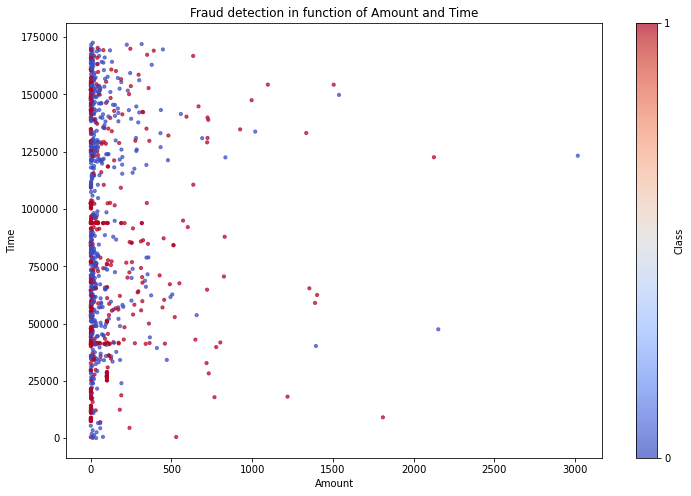

In [9]:

plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=new_df['Amount'], y=new_df['Time'], c=new_df['Class'], cmap='coolwarm', alpha=0.7, s=10)
plt.colorbar(scatter, label='Class', ticks=[0, 1])
plt.title('Fraud detection in function of Amount and Time')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()

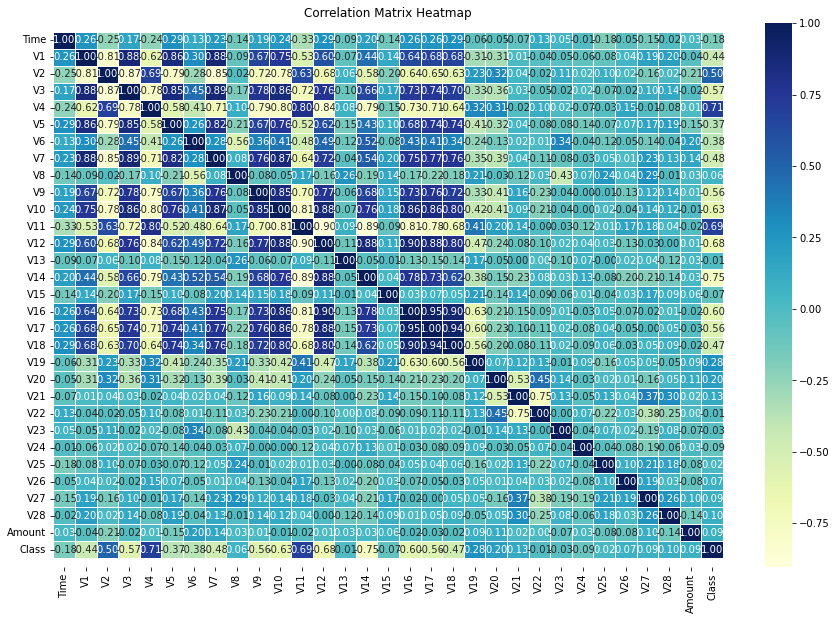

In [10]:
# Make a correlation matrix
corr_matrix = new_df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt='.2f',
            cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 5. Modelling

In [119]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Let's isoalte x and y
x = new_df.drop('Class', axis=1)
y = new_df['Class']

# Split the data into training and testing sets
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

We'll train it(find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. LogisticRegression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [6]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(classifiers, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    classifiers: a dict of different sklearn machine learn models.
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in classifiers.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

model_scores = fit_and_score(classifiers=classifiers,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'LogisticRegression': 0.949238578680203,
 'KNearest': 0.6395939086294417,
 'Random Forest': 0.9543147208121827}

# Model Comparasion

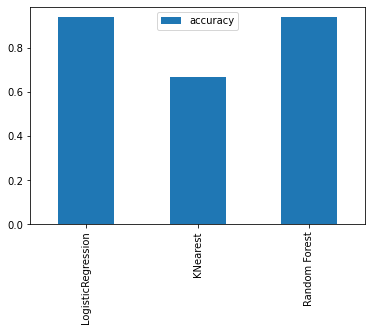

In [132]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model...and we know a model's first predictions aren't always what we should based or next steps off.

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classificaiton Report
* ROC Curve
* Area udner the curve (AUC)

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [7]:
# Create a hyperparameter grid for LogisticRegression
lr_grid = {"C" : np.logspace(-4,4,20),
           "solver" : ['liblinear']}

# Create a hyperparameter for RandomForestClassifier
rf_grid = {'n_estimators' : [50,100,200,500,1000,1200],
           'max_depth' : [None, 20,30,50,100],
           'max_features' : ['auto', 'sqrt'],
           'min_samples_split' : [2,5,10],
           'min_samples_leaf' : [2,4,6]}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [8]:
# Tune LogisitcRegression
np.random.seed(42)

# Setup random Hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [9]:
# Get the best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [10]:
# Check the score
rs_log_reg.score(x_test,y_test)

0.949238578680203

Now we've tuned LogisticRegression(), let's to the same for RandomForestClassifier()

In [11]:
# Setup Random Seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [12]:
# Get the best params
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50}

In [13]:
#  Check the score
rs_rf.score(x_test,y_test)

0.9543147208121827

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion Matrix
* Classification report
* Precision 
* Recall
* F1 Score

.... and will be great if cross-validation was used where possibile.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [14]:
# Make predictions with tuned model
y_preds = rs_rf.predict(x_test)

In [15]:
y_preds

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [16]:
np.array(y_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


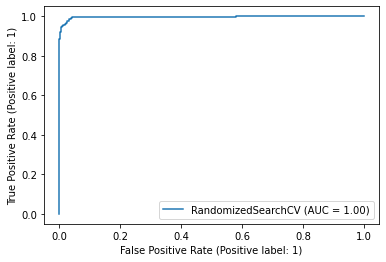

In [19]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, x,y);

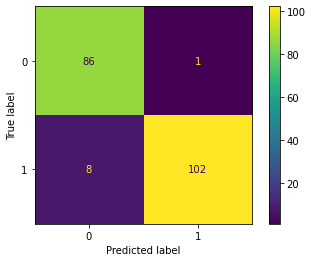

In [25]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred = y_preds);

Now we've got ROC curve, an AUC metric and a confusion matrix. Let's get a clasification report as well as cross_validated precision, recall and f1-score.

In [26]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.99      0.93      0.96       110

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197



### Calculate evaluation metrics using cross-validation 

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation

In [27]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50}

In [34]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators=50,
                             min_samples_split=2,
                             min_samples_leaf=4,
                             max_features='auto',
                             max_depth=50)

In [37]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc_mean = np.mean(cv_acc)
cv_acc_mean

0.9390241375738112

In [39]:
# Cross-validated precision
cv_pr = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_pr_mean = np.mean(cv_pr)
cv_pr_mean

0.9762072046000728

In [40]:
# Cross-validated recall
cv_re = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_re_mean = np.mean(cv_re)
cv_re_mean

0.8942898371469801

In [41]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.9304375559209292

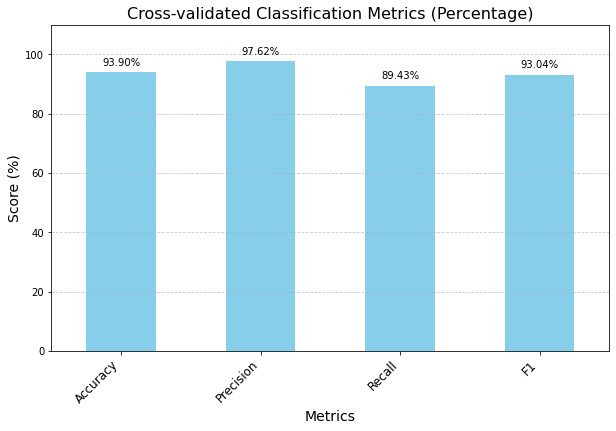

In [85]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc_mean * 100,
    "Precision": cv_pr_mean * 100,
    "Recall": cv_re_mean * 100,
    "F1": cv_f1_mean * 100
}, index=[0])

# Transpose the DataFrame for better visualization
cv_metrics_T = cv_metrics.T

# Set a color palette for the plot
colors = ['skyblue']

# Plotting the bar chart
ax = cv_metrics_T.plot(kind='bar', color=colors, legend=False, figsize=(10, 6))

# Enhancements
ax.set_title('Cross-validated Classification Metrics (Percentage)', fontsize=16)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_ylim([0, 110])  # Set y-axis limit to percentage scale
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Show the plot
plt.show()

### Feature Importance

Which features contributed most to the outcomes of the model and how did they contribute?
Let's find the feature importance for our RandomForestClassifier model.

In [87]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
232825,147321.0,-0.457888,0.609312,1.415394,-0.741919,0.243063,0.179429,0.305546,0.060640,0.251838,...,0.264504,0.876421,-0.207152,0.690410,-0.347634,0.495181,-0.004411,0.172563,11.50,0
59539,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
239970,150366.0,-3.613174,0.811800,-0.438035,-0.606720,0.330161,0.680908,-1.153371,-5.098322,0.870757,...,4.426892,-0.941084,0.413474,-0.466910,0.021616,1.559862,-0.519386,0.580338,51.00,0
106998,70229.0,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,-1.657635,...,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,3.79,1
203324,134766.0,-0.079653,3.222010,-3.724201,6.037345,0.583395,-0.691346,-1.799885,-2.627781,-4.001338,...,-0.664694,1.138556,-0.350753,-0.287467,0.808889,0.823962,0.668497,0.595610,1.00,1


In [88]:
# Fit an instance of RandomForestClassifier
clf.fit(x_train,y_train);

In [90]:
# Get feature importances
feature_importances = clf.feature_importances_

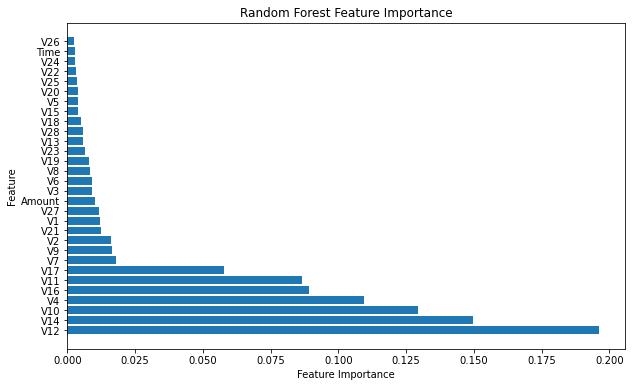

In [96]:
# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({
    "Feature" : x.columns,
    "Importance" : feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()